In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [2]:
df=pd.read_csv('screener_data-3.csv')

In [3]:
df.head()

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,ROE,ROCE,Debt to equity,Dividend Yield,...,Current ratio,Int Coverage,Industry PE,PEG Ratio,Book Value,Return over 3years,Return over 5years,CMP / FCF,Chg in FII Hold,Chg in Prom Hold 3Yr
0,20MICRONS,3.421026e+09,8.28,35286500.0,96.95,Chemicals,15.5,18.70,0.46,0.00,...,1.27,0,9.81,0.56,66.2,43.7,19.80,9.17,0.20,0.00
1,21STCENMGM,2.147250e+08,0.00,10500000.0,20.45,Investment Banking & Investment Services,-62.7,-43.10,0.66,0.00,...,0.03,0,33.10,NaN,18.9,25.9,-9.21,62.6,0.00,5.82
2,360ONE,1.572393e+11,23.73,356835000.0,440.65,Investment Banking & Investment Services,20.8,17.00,0.52,3.83,...,0.47,0,33.10,1.26,66.1,18.4,NaN,81.8,3.67,-0.91
3,3IINFOLTD,5.803792e+09,429.38,168470000.0,34.45,Software & IT Services,4.31,4.68,0.12,0.00,...,0.46,0,36.20,0.80,53.7,145.0,53.30,5.30,0.09,0.00
4,3MINDIA,3.146407e+11,69.31,11265070.0,27930.65,Consumer Goods Conglomerates,18.8,25.30,0.01,0.37,...,2.04,0,30.20,12.1,"1,729",13.3,6.39,101,-0.68,0.00


In [4]:
data1= df.drop(['P/E','INDUSTRY','TICKER SYMBOL','MARKET CAP','OUTSATNDING SHARES','PRICE','Int Coverage','Return over 3years'], axis=1, inplace = True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROE                   1780 non-null   object 
 1   ROCE                  1845 non-null   float64
 2   Debt to equity        1793 non-null   float64
 3   Dividend Yield        1875 non-null   float64
 4   DII holding           1732 non-null   float64
 5   Promoter holding      1873 non-null   float64
 6   FII holding           1732 non-null   float64
 7   Return on assets      1872 non-null   float64
 8   Pledged percentage    1873 non-null   float64
 9   Current ratio         1873 non-null   object 
 10  Industry PE           1874 non-null   float64
 11  PEG Ratio             1518 non-null   object 
 12  Book Value            1863 non-null   object 
 13  Return over 5years    1611 non-null   float64
 14  CMP / FCF             1865 non-null   object 
 15  Chg in FII Hold      

In [6]:
df.describe()

,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Industry PE,Return over 5years,Chg in FII Hold,Chg in Prom Hold 3Yr
count,1845.000000,1793.000000,1875.000000,1732.000000,1873.000000,1732.000000,1872.000000,1873.000000,1874.000000,1611.000000,1715.000000,1710.000000
mean,12.459978,1.058148,0.776288,6.054070,55.534645,6.060196,4.974167,7.038687,33.006025,11.718305,0.047195,-1.059561
std,23.702778,7.006558,1.960706,8.513688,18.445931,9.345495,15.521430,20.613247,29.674190,24.925124,1.672156,9.695730
min,-508.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-313.000000,0.000000,5.300000,-64.800000,-29.000000,-62.200000
25%,4.770000,0.030000,0.000000,0.000000,46.200000,0.080000,1.050000,0.000000,24.200000,-1.495000,-0.120000,-1.307500
50%,11.400000,0.220000,0.220000,1.525000,58.400000,1.890000,4.670000,0.000000,28.600000,9.190000,0.000000,0.000000
75%,19.300000,0.670000,0.900000,10.300000,70.300000,8.285000,9.922500,0.000000,36.200000,22.150000,0.080000,0.355000
max,258.000000,274.000000,46.700000,60.300000,99.000000,71.800000,110.000000,100.000000,725.000000,221.000000,32.000000,79.500000


In [7]:
df6=pd.read_excel('Stockmarket_financial_data.xlsx')
df6

,Unnamed: 0.1,Unnamed: 0,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,0,206,BANARISUG,3.492996e+10,24.39,1.253970e+07,2785.55,Food & Tobacco,6.73,5.46,...,37.50,26.4,14.8,566,1.36,4.05,22.3,"1,998",-45.3,21.6
1,1,207,BANCOINDIA,2.193835e+10,9.13,7.151865e+07,306.75,Automobiles & Auto Parts,12,804,...,58.20,26.2,8.34,43.2,2.35,0.00,80.1,795,-30.7,6.69
2,2,208,BANDHANBNK,4.090770e+11,18.12,1.610856e+09,253.95,Banking Services,6.19,1.37,...,-15.50,12.8,16.2,"-5,092",2.08,60.5,-25,"13,872",691,14.4
3,3,209,BANG,5.481386e+08,47.24,1.358460e+07,40.35,Textiles & Apparel,5.2,4.18,...,34.50,52.6,19.2,-1.60,0.47,26.6,8.89,80.2,-13.3,9.44
4,4,210,BANKA,7.576337e+08,20.51,1.084658e+07,69.85,Professional & Commercial Services,6.38,4.12,...,31.10,9.09,15.7,1.77,1.73,4.94,-13.5,38.6,-4.11,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,885,1871,ZOTA,8.987269e+09,0.00,2.516033e+07,357.20,Pharmaceuticals,0.81,136,...,41.60,5.68,124,-3.36,7.29,0.00,49.1,131,12.4,70.7
1666,886,1872,ZUARI,6.407537e+09,1.31,4.205801e+07,152.35,Chemicals,3.29,0.43,...,21.30,98.8,30.4,"3,089",4.13,-7.87,6.19,0.11,515,-1.61
1667,887,1873,ZUARIIND,4.318271e+09,1.41,2.978118e+07,145.00,Food & Tobacco,11.5,1.19,...,41.90,33.0,8.67,237,0.55,66.7,-3.58,610,29.7,6.24
1668,888,1874,ZYDUSLIFE,5.577751e+11,28.40,1.012204e+09,551.05,Pharmaceuticals,3.63,8.75,...,19.20,11.4,27.6,"2,876",7.16,3.16,74.1,"7,837",755,30.6


In [8]:
df6=df6.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [9]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TICKER SYMBOL        1670 non-null   object 
 1   MARKET CAP           1659 non-null   float64
 2   P/E                  1670 non-null   float64
 3   OUTSATNDING SHARES   1660 non-null   float64
 4   PRICE                1668 non-null   float64
 5   INDUSTRY             1661 non-null   object 
 6   Earnings yield       1666 non-null   object 
 7   Int Coverage         1601 non-null   object 
 8   Price to Sales       1644 non-null   object 
 9   Profit Var 3Yrs      1516 non-null   object 
 10  Sales growth 3Years  1621 non-null   object 
 11  Qtr Sales Var        1623 non-null   object 
 12  Qtr Profit Var       1649 non-null   object 
 13  Profit growth        1663 non-null   object 
 14  Return over 3years   1507 non-null   float64
 15  Sales growth         1645 non-null   o

In [10]:

df6["Earnings yield"] = df6["Earnings yield"].astype("str")
df6["Int Coverage"] = df6["Int Coverage"].astype("str")
df6["Price to Sales"] = df6["Price to Sales"].astype("str")
df6["Profit Var 3Yrs"] = df6["Profit Var 3Yrs"].astype("str")
df6["Sales growth 3Years"] = df6["Sales growth 3Years"].astype("str")
df6["Qtr Sales Var"] = df6["Qtr Sales Var"].astype("str")
df6["Qtr Profit Var"] = df6["Qtr Profit Var"].astype("str")
df6["Profit growth"] = df6["Profit growth"].astype("str")
df6["Sales growth"] = df6["Sales growth"].astype("str")
df6["EV / EBIT"] = df6["EV / EBIT"].astype("str")
df6["Free Cash Flow 3Yrs"] = df6["Free Cash Flow 3Yrs"].astype("str")
df6["Market Cap to Sales"] = df6["Market Cap to Sales"].astype("str")
df6["Debt To Profit"] = df6["Debt To Profit"].astype("str")
df6["Return over 1year"] = df6["Return over 1year"].astype("str")
df6["Sales Prev Ann"] = df6["Sales Prev Ann"].astype("str")
df6["FCF Prev Ann"] = df6["FCF Prev Ann"].astype("str")
df6["3Yrs PE"] = df6["3Yrs PE"].astype("str")


df6["Earnings yield"] = df6["Earnings yield"].str.replace(",", "")
df6["Int Coverage"] = df6["Int Coverage"].str.replace(",", "")
df6["Price to Sales"] = df6["Price to Sales"].str.replace(",", "")
df6["Profit Var 3Yrs"] = df6["Profit Var 3Yrs"].str.replace(",", "")
df6["Sales growth 3Years"] = df6["Sales growth 3Years"].str.replace(",", "")
df6["Qtr Sales Var"] = df6["Qtr Sales Var"].str.replace(",", "")
df6["Qtr Profit Var"] = df6["Qtr Profit Var"].str.replace(",", "")
df6["Profit growth"] = df6["Profit growth"].str.replace(",", "")
df6["Sales growth"] = df6["Sales growth"].str.replace(",", "")
df6["EV / EBIT"] = df6["EV / EBIT"].str.replace(",", "")
df6["Free Cash Flow 3Yrs"] = df6["Free Cash Flow 3Yrs"].str.replace(",", "")
df6["Market Cap to Sales"] = df6["Market Cap to Sales"].str.replace(",", "")
df6["Debt To Profit"] = df6["Debt To Profit"].str.replace(",", "")
df6["Return over 1year"] = df6["Return over 1year"].str.replace(",", "")
df6["Sales Prev Ann"] = df6["Sales Prev Ann"].str.replace(",", "")
df6["FCF Prev Ann"] = df6["FCF Prev Ann"].str.replace(",", "")
df6["3Yrs PE"] = df6["3Yrs PE"].str.replace(",", "")



df6["Earnings yield"] = df6["Earnings yield"].astype("float")
df6["Int Coverage"] = df6["Int Coverage"].astype("float")
df6["Price to Sales"] = df6["Price to Sales"].astype("float")
df6["Profit Var 3Yrs"] = df6["Profit Var 3Yrs"].astype("float")
df6["Sales growth 3Years"] = df6["Sales growth 3Years"].astype("float")
df6["Qtr Sales Var"] = df6["Qtr Sales Var"].astype("float")
df6["Qtr Profit Var"] = df6["Qtr Profit Var"].astype("float")
df6["Profit growth"] = df6["Profit growth"].astype("float")
df6["Sales growth"] = df6["Sales growth"].astype("float")
df6["EV / EBIT"] = df6["EV / EBIT"].astype("float")
df6["Free Cash Flow 3Yrs"] = df6["Free Cash Flow 3Yrs"].astype("float")
df6["Market Cap to Sales"] = df6["Market Cap to Sales"].astype("float")
df6["Debt To Profit"] = df6["Debt To Profit"].astype("float")
df6["Return over 1year"] = df6["Return over 1year"].astype("float")
df6["Sales Prev Ann"] = df6["Sales Prev Ann"].astype("float")
df6["FCF Prev Ann"] = df6["FCF Prev Ann"].astype("float")
df6["3Yrs PE"] = df6["3Yrs PE"].astype("float")


In [11]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TICKER SYMBOL        1670 non-null   object 
 1   MARKET CAP           1659 non-null   float64
 2   P/E                  1670 non-null   float64
 3   OUTSATNDING SHARES   1660 non-null   float64
 4   PRICE                1668 non-null   float64
 5   INDUSTRY             1661 non-null   object 
 6   Earnings yield       1666 non-null   float64
 7   Int Coverage         1601 non-null   float64
 8   Price to Sales       1644 non-null   float64
 9   Profit Var 3Yrs      1516 non-null   float64
 10  Sales growth 3Years  1621 non-null   float64
 11  Qtr Sales Var        1623 non-null   float64
 12  Qtr Profit Var       1649 non-null   float64
 13  Profit growth        1663 non-null   float64
 14  Return over 3years   1507 non-null   float64
 15  Sales growth         1645 non-null   f

In [12]:
df6.reset_index(drop = True)
df6

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,BANARISUG,3.492996e+10,24.39,1.253970e+07,2785.55,Food & Tobacco,6.73,5.46,1.36,14.50,...,37.50,26.40,14.80,566.00,1.36,4.05,22.30,1998.00,-45.30,21.60
1,BANCOINDIA,2.193835e+10,9.13,7.151865e+07,306.75,Automobiles & Auto Parts,12.00,804.00,2.35,54.90,...,58.20,26.20,8.34,43.20,2.35,0.00,80.10,795.00,-30.70,6.69
2,BANDHANBNK,4.090770e+11,18.12,1.610856e+09,253.95,Banking Services,6.19,1.37,2.08,-10.10,...,-15.50,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.00,691.00,14.40
3,BANG,5.481386e+08,47.24,1.358460e+07,40.35,Textiles & Apparel,5.20,4.18,0.47,-14.00,...,34.50,52.60,19.20,-1.60,0.47,26.60,8.89,80.20,-13.30,9.44
4,BANKA,7.576337e+08,20.51,1.084658e+07,69.85,Professional & Commercial Services,6.38,4.12,1.73,-20.90,...,31.10,9.09,15.70,1.77,1.73,4.94,-13.50,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,ZOTA,8.987269e+09,0.00,2.516033e+07,357.20,Pharmaceuticals,0.81,136.00,7.29,30.80,...,41.60,5.68,124.00,-3.36,7.29,0.00,49.10,131.00,12.40,70.70
1666,ZUARI,6.407537e+09,1.31,4.205801e+07,152.35,Chemicals,3.29,0.43,4.13,17.50,...,21.30,98.80,30.40,3089.00,4.13,-7.87,6.19,0.11,515.00,-1.61
1667,ZUARIIND,4.318271e+09,1.41,2.978118e+07,145.00,Food & Tobacco,11.50,1.19,0.55,-17.30,...,41.90,33.00,8.67,237.00,0.55,66.70,-3.58,610.00,29.70,6.24
1668,ZYDUSLIFE,5.577751e+11,28.40,1.012204e+09,551.05,Pharmaceuticals,3.63,8.75,7.16,3.43,...,19.20,11.40,27.60,2876.00,7.16,3.16,74.10,7837.00,755.00,30.60


In [13]:
df6.isnull().sum()

TICKER SYMBOL            0
MARKET CAP              11
P/E                      0
OUTSATNDING SHARES      10
PRICE                    2
INDUSTRY                 9
Earnings yield           4
Int Coverage            69
Price to Sales          26
Profit Var 3Yrs        154
Sales growth 3Years     49
Qtr Sales Var           47
Qtr Profit Var          21
Profit growth            7
Return over 3years     163
Sales growth            25
EV / EBIT                6
Free Cash Flow 3Yrs      6
Market Cap to Sales     26
Debt To Profit           5
Return over 1year       43
Sales Prev Ann           3
FCF Prev Ann             4
3Yrs PE                 11
dtype: int64

In [14]:
data_copy=df6.copy()

In [81]:
data_copy.iloc[830:840]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
830,MARUTI,2.900318e+12,35.30,302000000.0,9603.70,Automobiles & Auto Parts,3.49,55.40,2.51,35.80,...,18.50,33.10,28.6,7960.00,2.51,0.15,11.70,88296.00,-1532.00,31.10
831,MASFIN,4.173447e+10,20.52,54662040.0,763.50,Banking Services,7.96,1.56,4.47,5.92,...,4.63,44.50,12.6,-2818.00,4.47,29.00,48.90,656.00,-825.00,18.60
832,MASKINVEST,NaN,0.00,NaN,73.85,NaN,0.52,5.00,59.10,NaN,...,5.19,40.90,190.0,-0.33,59.10,12.80,36.40,0.22,-0.39,1350.00
833,MASTEK,6.049037e+10,20.32,30590090.0,1977.45,Software & IT Services,1.58,306.00,20.80,45.50,...,73.50,21.80,63.2,90.60,20.80,0.02,6.58,257.00,-0.48,35.10
834,MATRIMONY,1.436798e+10,30.93,22256960.0,645.55,Software & IT Services,4.45,9.72,3.20,14.60,...,18.20,4.42,22.5,172.00,3.20,1.42,-16.00,430.00,66.20,23.80
835,MAWANASUG,3.874525e+09,28.87,39116860.0,99.05,Food & Tobacco,6.52,1.73,0.27,30.90,...,53.00,0.24,15.3,59.30,0.27,22.20,-0.69,1478.00,-161.00,1.88
836,MAXHEALTH,5.774104e+11,51.45,971417200.0,594.40,Healthcare Providers & Services,1.05,11.80,31.10,518.00,...,NaN,10.20,95.1,833.00,31.10,0.77,66.10,1729.00,59.40,61.60
837,MAXIND,5.058060e+09,0.00,43029010.0,117.55,Healthcare Providers & Services,1.09,29.40,19.80,38.00,...,NaN,-0.21,91.5,-14.30,19.80,0.07,98.20,32.60,-7.90,39.80
838,MAXVIL,3.019201e+10,187.04,147134500.0,205.20,Real Estate Operations,0.98,7.45,120.00,25.70,...,81.20,-95.30,102.0,-82.40,120.00,1.65,88.10,508.00,-81.10,41.70
839,MAYURUNIQ,2.237187e+10,22.38,43952600.0,509.00,Textiles & Apparel,6.35,60.90,2.88,10.40,...,30.60,21.10,15.8,79.20,2.88,0.23,25.30,631.00,-35.10,17.20


In [85]:
deleted_one = data_copy.iloc[834:835]
data_copy = data_copy.drop(deleted_one.index)


In [86]:
data_copy.iloc[830:840]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
830,MARUTI,2.900318e+12,35.30,302000000.0,9603.70,Automobiles & Auto Parts,3.49,55.40,2.51,35.80,...,18.50,33.10,28.60,7960.00,2.51,0.15,11.70,88296.00,-1532.00,31.10
831,MASFIN,4.173447e+10,20.52,54662040.0,763.50,Banking Services,7.96,1.56,4.47,5.92,...,4.63,44.50,12.60,-2818.00,4.47,29.00,48.90,656.00,-825.00,18.60
832,MASKINVEST,NaN,0.00,NaN,73.85,NaN,0.52,5.00,59.10,NaN,...,5.19,40.90,190.00,-0.33,59.10,12.80,36.40,0.22,-0.39,1350.00
833,MASTEK,6.049037e+10,20.32,30590090.0,1977.45,Software & IT Services,1.58,306.00,20.80,45.50,...,73.50,21.80,63.20,90.60,20.80,0.02,6.58,257.00,-0.48,35.10
835,MAWANASUG,3.874525e+09,28.87,39116860.0,99.05,Food & Tobacco,6.52,1.73,0.27,30.90,...,53.00,0.24,15.30,59.30,0.27,22.20,-0.69,1478.00,-161.00,1.88
836,MAXHEALTH,5.774104e+11,51.45,971417200.0,594.40,Healthcare Providers & Services,1.05,11.80,31.10,518.00,...,NaN,10.20,95.10,833.00,31.10,0.77,66.10,1729.00,59.40,61.60
837,MAXIND,5.058060e+09,0.00,43029010.0,117.55,Healthcare Providers & Services,1.09,29.40,19.80,38.00,...,NaN,-0.21,91.50,-14.30,19.80,0.07,98.20,32.60,-7.90,39.80
838,MAXVIL,3.019201e+10,187.04,147134500.0,205.20,Real Estate Operations,0.98,7.45,120.00,25.70,...,81.20,-95.30,102.00,-82.40,120.00,1.65,88.10,508.00,-81.10,41.70
839,MAYURUNIQ,2.237187e+10,22.38,43952600.0,509.00,Textiles & Apparel,6.35,60.90,2.88,10.40,...,30.60,21.10,15.80,79.20,2.88,0.23,25.30,631.00,-35.10,17.20
840,MAZDA,3.424075e+09,12.96,4005000.0,854.95,"Machinery, Equipment & Components",10.70,57.70,1.82,17.00,...,42.60,16.10,9.38,21.60,1.82,0.02,50.80,165.00,-7.45,9.24


In [87]:
deleted_one1 = data_copy.iloc[1160:1161]
data_copy = data_copy.drop(deleted_one1.index)

In [88]:
data_copy.iloc[1155:1165]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1156,RCF,6.027193e+10,6.25,5.516881e+08,109.25,Chemicals,17.40,6.27,0.29,48.30,...,33.80,67.40,5.76,4621.0,0.29,1.94,33.20,12812.0,-752.00,7.00
1157,RCOM,3.018679e+09,37.93,2.744254e+09,1.10,Telecommunications Services,-11.00,NaN,1.04,22.80,...,-20.60,-3.77,-9.13,-45.0,1.04,-3.78,-43.20,345.0,21.00,-0.10
1158,RECLTD,4.018300e+11,3.79,2.633224e+09,152.60,Banking Services,8.89,1.58,1.09,31.30,...,26.80,0.10,11.20,-85104.0,1.09,34.40,72.40,39169.0,-4011.00,2.76
1159,REDINGTON,1.460424e+11,10.61,7.816024e+08,186.85,"Computers, Phones & Household Electronics",8.70,16.50,0.40,29.80,...,56.20,30.80,11.50,-701.0,0.40,1.54,47.70,27019.0,579.00,12.10
1160,REFEX,1.214228e+10,9.95,2.210702e+07,549.25,Chemicals,11.10,9.07,0.89,46.40,...,140.00,267.00,9.02,51.4,0.89,1.29,455.00,444.0,-22.80,4.41
1162,RELAXO,2.298459e+11,147.84,2.489261e+08,923.35,Textiles & Apparel,0.99,11.90,8.32,-12.00,...,14.30,4.88,101.00,524.0,8.32,1.06,-5.09,2653.0,-82.90,74.60
1163,RELCAPITAL,2.259980e+09,0.00,2.511089e+08,9.00,Investment Banking & Investment Services,-9.75,-5691.00,14.50,19.00,...,-0.44,23.00,-10.20,92.6,14.50,-10.20,-8.57,15.9,43.30,-0.12
1164,RELCHEMQ,1.426865e+09,11.32,7.543560e+06,189.15,Textiles & Apparel,11.20,2.20,0.37,10.20,...,44.80,0.86,8.91,-32.8,0.37,16.00,-22.30,362.0,8.67,8.39
1165,RELIANCE,1.743768e+13,25.89,6.766120e+09,2577.40,Oil & Gas,3.53,5.40,3.35,8.82,...,10.90,25.40,28.30,47875.0,3.35,4.96,4.67,422413.0,49372.00,35.70
1166,RELIGARE,5.596458e+10,1.81,3.235882e+08,172.95,Insurance,0.03,0.15,237.00,24.40,...,64.50,-17.10,3044.00,-59.2,237.00,-21.10,31.90,27.7,-23.10,-159.00


In [91]:
data_copy.iloc[1159:1160]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1160,REFEX,1.214228e+10,9.95,22107020.0,549.25,Chemicals,11.1,9.07,0.89,46.4,...,140.0,267.0,9.02,51.4,0.89,1.29,455.0,444.0,-22.8,4.41


In [92]:
deleted_one2 = data_copy.iloc[1159:1160]
data_copy = data_copy.drop(deleted_one2.index)

In [94]:
data_copy.iloc[1159]

TICKER SYMBOL                      RELAXO
MARKET CAP                 229845900000.0
P/E                                147.84
OUTSATNDING SHARES            248926100.0
PRICE                              923.35
INDUSTRY               Textiles & Apparel
Earnings yield                       0.99
Int Coverage                         11.9
Price to Sales                       8.32
Profit Var 3Yrs                     -12.0
Sales growth 3Years                   4.9
Qtr Sales Var                        9.56
Qtr Profit Var                       0.59
Profit growth                       -32.0
Return over 3years                   14.3
Sales growth                         4.88
EV / EBIT                           101.0
Free Cash Flow 3Yrs                 524.0
Market Cap to Sales                  8.32
Debt To Profit                       1.06
Return over 1year                   -5.09
Sales Prev Ann                     2653.0
FCF Prev Ann                        -82.9
3Yrs PE                           

In [98]:
data_copy.iloc[1530:1531]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1533,UCALFUEL,2.683488e+09,312.95,22113620.0,121.35,Automobiles & Auto Parts,6.7,1.71,0.53,-40.3,...,6.05,7.42,14.9,76.7,0.53,18.0,13.7,544.0,21.6,8.75


In [99]:
deleted_one3=data_copy.iloc[1530:1531]
data_copy = data_copy.drop(deleted_one3.index)

In [100]:
data_copy.iloc[1530:1531]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1534,UCOBANK,3.150395e+11,17.04,1.195596e+10,26.35,Banking Services,4.79,1.28,1.95,40.3,...,25.8,17.8,20.9,9149.0,1.95,145.0,150.0,14981.0,4189.0,15.2


In [104]:
data_copy.iloc[1605:1606]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1609,VISHWARAJ,3.530264e+09,0.0,187780000.0,18.8,Food & Tobacco,8.07,1.93,0.49,NaN,...,-0.73,31.9,12.4,83.3,0.49,-15.2,-10.2,467.0,2.27,-11.6


In [105]:
deleted_one4=data_copy.iloc[1605:1606]
data_copy = data_copy.drop(deleted_one4.index)

In [106]:
data_copy.iloc[1605:1606]

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
1610,VIVIDHA,263430500.0,0.0,292700500.0,0.9,Textiles & Apparel,-2.13,-1.03,31.5,23.9,...,23.6,-77.8,-46.9,-0.33,31.5,-6.01,-34.6,3.56,0.14,-16.0


In [110]:
data_copy=data_copy.reset_index()

In [111]:
data_copy.drop('index', axis=1, inplace = True)

In [112]:
data_copy

,TICKER SYMBOL,MARKET CAP,P/E,OUTSATNDING SHARES,PRICE,INDUSTRY,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,BANARISUG,3.492996e+10,24.39,1.253970e+07,2785.55,Food & Tobacco,6.73,5.46,1.36,14.50,...,37.50,26.40,14.80,566.00,1.36,4.05,22.30,1998.00,-45.30,21.60
1,BANCOINDIA,2.193835e+10,9.13,7.151865e+07,306.75,Automobiles & Auto Parts,12.00,804.00,2.35,54.90,...,58.20,26.20,8.34,43.20,2.35,0.00,80.10,795.00,-30.70,6.69
2,BANDHANBNK,4.090770e+11,18.12,1.610856e+09,253.95,Banking Services,6.19,1.37,2.08,-10.10,...,-15.50,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.00,691.00,14.40
3,BANG,5.481386e+08,47.24,1.358460e+07,40.35,Textiles & Apparel,5.20,4.18,0.47,-14.00,...,34.50,52.60,19.20,-1.60,0.47,26.60,8.89,80.20,-13.30,9.44
4,BANKA,7.576337e+08,20.51,1.084658e+07,69.85,Professional & Commercial Services,6.38,4.12,1.73,-20.90,...,31.10,9.09,15.70,1.77,1.73,4.94,-13.50,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,ZOTA,8.987269e+09,0.00,2.516033e+07,357.20,Pharmaceuticals,0.81,136.00,7.29,30.80,...,41.60,5.68,124.00,-3.36,7.29,0.00,49.10,131.00,12.40,70.70
1661,ZUARI,6.407537e+09,1.31,4.205801e+07,152.35,Chemicals,3.29,0.43,4.13,17.50,...,21.30,98.80,30.40,3089.00,4.13,-7.87,6.19,0.11,515.00,-1.61
1662,ZUARIIND,4.318271e+09,1.41,2.978118e+07,145.00,Food & Tobacco,11.50,1.19,0.55,-17.30,...,41.90,33.00,8.67,237.00,0.55,66.70,-3.58,610.00,29.70,6.24
1663,ZYDUSLIFE,5.577751e+11,28.40,1.012204e+09,551.05,Pharmaceuticals,3.63,8.75,7.16,3.43,...,19.20,11.40,27.60,2876.00,7.16,3.16,74.10,7837.00,755.00,30.60


In [113]:
data_copy.to_excel("additional_new_finance_data.xlsx", index=True)

In [16]:
df6.drop(['TICKER SYMBOL','OUTSATNDING SHARES','PRICE','INDUSTRY'], axis=1, inplace = True)


In [17]:
df6

,MARKET CAP,P/E,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,Sales growth 3Years,Qtr Sales Var,Qtr Profit Var,Profit growth,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,3.492996e+10,24.39,6.73,5.46,1.36,14.50,16.20,42.10,106.0,75.60,37.50,26.40,14.80,566.00,1.36,4.05,22.30,1998.00,-45.30,21.60
1,2.193835e+10,9.13,12.00,804.00,2.35,54.90,18.80,12.20,135.0,187.00,58.20,26.20,8.34,43.20,2.35,0.00,80.10,795.00,-30.70,6.69
2,4.090770e+11,18.12,6.19,1.37,2.08,-10.10,13.50,11.50,-18.7,217.00,-15.50,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.00,691.00,14.40
3,5.481386e+08,47.24,5.20,4.18,0.47,-14.00,7.72,38.80,-95.3,-75.30,34.50,52.60,19.20,-1.60,0.47,26.60,8.89,80.20,-13.30,9.44
4,7.576337e+08,20.51,6.38,4.12,1.73,-20.90,-4.15,17.20,-55.6,0.65,31.10,9.09,15.70,1.77,1.73,4.94,-13.50,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,8.987269e+09,0.00,0.81,136.00,7.29,30.80,13.40,14.20,-54.3,-41.60,41.60,5.68,124.00,-3.36,7.29,0.00,49.10,131.00,12.40,70.70
1666,6.407537e+09,1.31,3.29,0.43,4.13,17.50,-74.00,53.10,3269.0,265.00,21.30,98.80,30.40,3089.00,4.13,-7.87,6.19,0.11,515.00,-1.61
1667,4.318271e+09,1.41,11.50,1.19,0.55,-17.30,142.00,43.80,18.9,232.00,41.90,33.00,8.67,237.00,0.55,66.70,-3.58,610.00,29.70,6.24
1668,5.577751e+11,28.40,3.63,8.75,7.16,3.43,11.20,30.50,164.0,48.00,19.20,11.40,27.60,2876.00,7.16,3.16,74.10,7837.00,755.00,30.60


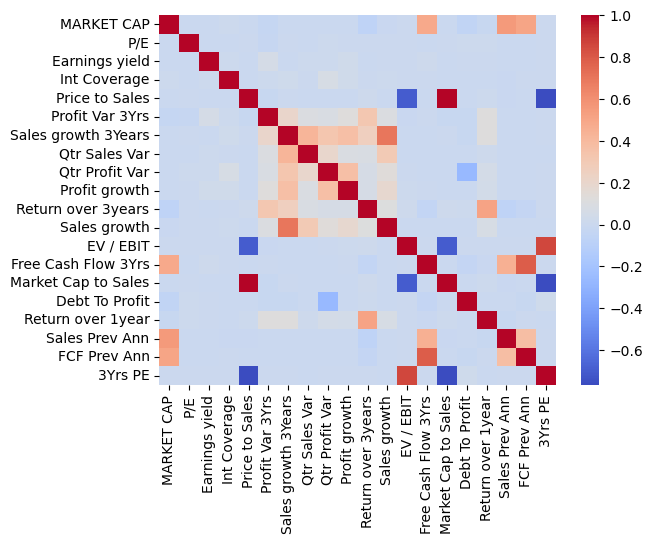

In [18]:
plt.figure()
sns.heatmap(df6.corr(), cmap='coolwarm')
plt.show()

In [19]:
new_data=df[206:]
new_data.reset_index(drop = True)
new_data


,ROE,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Current ratio,Industry PE,PEG Ratio,Book Value,Return over 5years,CMP / FCF,Chg in FII Hold,Chg in Prom Hold 3Yr
206,9.64,11.90,0.37,0.45,0.01,58.7,0.26,5.82,0.00,2.04,12.9,2.34,"1,238",13.80,18.4,0.00,0.00
207,34.7,39.70,0.00,6.59,0.03,67.9,1.88,30.20,0.00,5.13,27.9,0.57,102,7.36,151,0.73,0.00
208,12.6,7.14,6.69,0.00,13.20,40.0,31.90,1.58,0.00,2.68,14.1,1.68,108,-15.00,-22.4,-0.46,-21.00
209,1.38,3.82,0.36,0.00,0.00,72.6,0.00,0.86,0.00,2.03,27.6,-2.48,64.8,-3.35,-102,0.00,-0.35
210,7.89,10.00,0.37,0.00,NaN,55.2,NaN,5.04,0.00,2.36,25.0,2.37,37.4,16.20,126,NaN,-5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,6.65,8.76,0.00,0.41,NaN,68.1,NaN,4.95,0.27,3.00,28.6,-45.9,37.5,15.60,-817,NaN,-1.81
1872,NaN,3.61,3.86,0.00,1.00,65.3,1.13,-2.60,53.50,0.17,10.1,NaN,40.4,-16.60,0.58,0.03,0.23
1873,0.85,4.80,0.55,2.12,0.01,56.8,1.30,0.52,7.07,1.17,12.9,3.83,748,0.31,5.35,-0.01,1.97
1874,12.5,14.60,0.35,1.08,13.50,75.0,3.42,8.79,0.00,2.57,28.6,3.44,135,6.69,58.0,0.90,0.10


In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 206 to 1875
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROE                   1583 non-null   object 
 1   ROCE                  1641 non-null   float64
 2   Debt to equity        1593 non-null   float64
 3   Dividend Yield        1669 non-null   float64
 4   DII holding           1547 non-null   float64
 5   Promoter holding      1667 non-null   float64
 6   FII holding           1547 non-null   float64
 7   Return on assets      1666 non-null   float64
 8   Pledged percentage    1667 non-null   float64
 9   Current ratio         1667 non-null   object 
 10  Industry PE           1668 non-null   float64
 11  PEG Ratio             1351 non-null   object 
 12  Book Value            1658 non-null   object 
 13  Return over 5years    1439 non-null   float64
 14  CMP / FCF             1659 non-null   object 
 15  Chg in FII Hold    

In [21]:
new_data.index = new_data.index - 206

In [22]:
new_data

,ROE,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Current ratio,Industry PE,PEG Ratio,Book Value,Return over 5years,CMP / FCF,Chg in FII Hold,Chg in Prom Hold 3Yr
0,9.64,11.90,0.37,0.45,0.01,58.7,0.26,5.82,0.00,2.04,12.9,2.34,"1,238",13.80,18.4,0.00,0.00
1,34.7,39.70,0.00,6.59,0.03,67.9,1.88,30.20,0.00,5.13,27.9,0.57,102,7.36,151,0.73,0.00
2,12.6,7.14,6.69,0.00,13.20,40.0,31.90,1.58,0.00,2.68,14.1,1.68,108,-15.00,-22.4,-0.46,-21.00
3,1.38,3.82,0.36,0.00,0.00,72.6,0.00,0.86,0.00,2.03,27.6,-2.48,64.8,-3.35,-102,0.00,-0.35
4,7.89,10.00,0.37,0.00,NaN,55.2,NaN,5.04,0.00,2.36,25.0,2.37,37.4,16.20,126,NaN,-5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,6.65,8.76,0.00,0.41,NaN,68.1,NaN,4.95,0.27,3.00,28.6,-45.9,37.5,15.60,-817,NaN,-1.81
1666,NaN,3.61,3.86,0.00,1.00,65.3,1.13,-2.60,53.50,0.17,10.1,NaN,40.4,-16.60,0.58,0.03,0.23
1667,0.85,4.80,0.55,2.12,0.01,56.8,1.30,0.52,7.07,1.17,12.9,3.83,748,0.31,5.35,-0.01,1.97
1668,12.5,14.60,0.35,1.08,13.50,75.0,3.42,8.79,0.00,2.57,28.6,3.44,135,6.69,58.0,0.90,0.10


In [23]:
new_data.shape

(1670, 17)

In [24]:
df6

,MARKET CAP,P/E,Earnings yield,Int Coverage,Price to Sales,Profit Var 3Yrs,Sales growth 3Years,Qtr Sales Var,Qtr Profit Var,Profit growth,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,3.492996e+10,24.39,6.73,5.46,1.36,14.50,16.20,42.10,106.0,75.60,37.50,26.40,14.80,566.00,1.36,4.05,22.30,1998.00,-45.30,21.60
1,2.193835e+10,9.13,12.00,804.00,2.35,54.90,18.80,12.20,135.0,187.00,58.20,26.20,8.34,43.20,2.35,0.00,80.10,795.00,-30.70,6.69
2,4.090770e+11,18.12,6.19,1.37,2.08,-10.10,13.50,11.50,-18.7,217.00,-15.50,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.00,691.00,14.40
3,5.481386e+08,47.24,5.20,4.18,0.47,-14.00,7.72,38.80,-95.3,-75.30,34.50,52.60,19.20,-1.60,0.47,26.60,8.89,80.20,-13.30,9.44
4,7.576337e+08,20.51,6.38,4.12,1.73,-20.90,-4.15,17.20,-55.6,0.65,31.10,9.09,15.70,1.77,1.73,4.94,-13.50,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,8.987269e+09,0.00,0.81,136.00,7.29,30.80,13.40,14.20,-54.3,-41.60,41.60,5.68,124.00,-3.36,7.29,0.00,49.10,131.00,12.40,70.70
1666,6.407537e+09,1.31,3.29,0.43,4.13,17.50,-74.00,53.10,3269.0,265.00,21.30,98.80,30.40,3089.00,4.13,-7.87,6.19,0.11,515.00,-1.61
1667,4.318271e+09,1.41,11.50,1.19,0.55,-17.30,142.00,43.80,18.9,232.00,41.90,33.00,8.67,237.00,0.55,66.70,-3.58,610.00,29.70,6.24
1668,5.577751e+11,28.40,3.63,8.75,7.16,3.43,11.20,30.50,164.0,48.00,19.20,11.40,27.60,2876.00,7.16,3.16,74.10,7837.00,755.00,30.60


In [25]:
df_final = pd.concat([new_data, df6], axis=1)

In [26]:
df_final.head()

,ROE,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Current ratio,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,9.64,11.90,0.37,0.45,0.01,58.7,0.26,5.82,0.0,2.04,...,37.5,26.40,14.80,566.00,1.36,4.05,22.30,1998.0,-45.30,21.60
1,34.7,39.70,0.00,6.59,0.03,67.9,1.88,30.20,0.0,5.13,...,58.2,26.20,8.34,43.20,2.35,0.00,80.10,795.0,-30.70,6.69
2,12.6,7.14,6.69,0.00,13.20,40.0,31.90,1.58,0.0,2.68,...,-15.5,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.0,691.00,14.40
3,1.38,3.82,0.36,0.00,0.00,72.6,0.00,0.86,0.0,2.03,...,34.5,52.60,19.20,-1.60,0.47,26.60,8.89,80.2,-13.30,9.44
4,7.89,10.00,0.37,0.00,NaN,55.2,NaN,5.04,0.0,2.36,...,31.1,9.09,15.70,1.77,1.73,4.94,-13.50,38.6,-4.11,24.50


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROE                   1583 non-null   object 
 1   ROCE                  1641 non-null   float64
 2   Debt to equity        1593 non-null   float64
 3   Dividend Yield        1669 non-null   float64
 4   DII holding           1547 non-null   float64
 5   Promoter holding      1667 non-null   float64
 6   FII holding           1547 non-null   float64
 7   Return on assets      1666 non-null   float64
 8   Pledged percentage    1667 non-null   float64
 9   Current ratio         1667 non-null   object 
 10  Industry PE           1668 non-null   float64
 11  PEG Ratio             1351 non-null   object 
 12  Book Value            1658 non-null   object 
 13  Return over 5years    1439 non-null   float64
 14  CMP / FCF             1659 non-null   object 
 15  Chg in FII Hold      

In [28]:
df_final["ROE"] = df_final["ROE"].astype("str")
df_final["Current ratio"] = df_final["Current ratio"].astype("str")
df_final["Book Value"] = df_final["Book Value"].astype("str")
df_final["CMP / FCF"] = df_final["CMP / FCF"].astype("str")
df_final["PEG Ratio"] = df_final["PEG Ratio"].astype("str")

df_final["ROE"] = df_final["ROE"].str.replace(",", "")
df_final["Current ratio"] = df_final["Current ratio"].str.replace(",", "")
df_final["Book Value"] = df_final["Book Value"].str.replace(",", "")
df_final["CMP / FCF"] = df_final["CMP / FCF"].str.replace(",", "")
df_final["PEG Ratio"] = df_final["PEG Ratio"].str.replace(",", "")

df_final["ROE"] = df_final["ROE"].astype("float")
df_final["Current ratio"] = df_final["Current ratio"].astype("float")
df_final["Book Value"] = df_final["Book Value"].astype("float")
df_final["CMP / FCF"] = df_final["CMP / FCF"].astype("float")
df_final["PEG Ratio"] = df_final["PEG Ratio"].astype("float")


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROE                   1583 non-null   float64
 1   ROCE                  1641 non-null   float64
 2   Debt to equity        1593 non-null   float64
 3   Dividend Yield        1669 non-null   float64
 4   DII holding           1547 non-null   float64
 5   Promoter holding      1667 non-null   float64
 6   FII holding           1547 non-null   float64
 7   Return on assets      1666 non-null   float64
 8   Pledged percentage    1667 non-null   float64
 9   Current ratio         1667 non-null   float64
 10  Industry PE           1668 non-null   float64
 11  PEG Ratio             1351 non-null   float64
 12  Book Value            1658 non-null   float64
 13  Return over 5years    1439 non-null   float64
 14  CMP / FCF             1659 non-null   float64
 15  Chg in FII Hold      

In [30]:
df_final_copy=df_final.copy()

In [31]:
df_final.isnull().sum()

ROE                      87
ROCE                     29
Debt to equity           77
Dividend Yield            1
DII holding             123
Promoter holding          3
FII holding             123
Return on assets          4
Pledged percentage        3
Current ratio             3
Industry PE               2
PEG Ratio               319
Book Value               12
Return over 5years      231
CMP / FCF                11
Chg in FII Hold         137
Chg in Prom Hold 3Yr    147
MARKET CAP               11
P/E                       0
Earnings yield            4
Int Coverage             69
Price to Sales           26
Profit Var 3Yrs         154
Sales growth 3Years      49
Qtr Sales Var            47
Qtr Profit Var           21
Profit growth             7
Return over 3years      163
Sales growth             25
EV / EBIT                 6
Free Cash Flow 3Yrs       6
Market Cap to Sales      26
Debt To Profit            5
Return over 1year        43
Sales Prev Ann            3
FCF Prev Ann        

In [32]:
medians = df_final.median()

# Replace the null values with the median values
df_final = df_final.fillna(medians)

In [33]:
df_final_copy1=df_final.copy()

In [34]:
df_final.isnull().sum()

ROE                     0
ROCE                    0
Debt to equity          0
Dividend Yield          0
DII holding             0
Promoter holding        0
FII holding             0
Return on assets        0
Pledged percentage      0
Current ratio           0
Industry PE             0
PEG Ratio               0
Book Value              0
Return over 5years      0
CMP / FCF               0
Chg in FII Hold         0
Chg in Prom Hold 3Yr    0
MARKET CAP              0
P/E                     0
Earnings yield          0
Int Coverage            0
Price to Sales          0
Profit Var 3Yrs         0
Sales growth 3Years     0
Qtr Sales Var           0
Qtr Profit Var          0
Profit growth           0
Return over 3years      0
Sales growth            0
EV / EBIT               0
Free Cash Flow 3Yrs     0
Market Cap to Sales     0
Debt To Profit          0
Return over 1year       0
Sales Prev Ann          0
FCF Prev Ann            0
3Yrs PE                 0
dtype: int64

In [35]:
df_final.drop(['Return over 3years'], axis=1, inplace = True)

In [36]:
y=df_final_copy1['Return over 3years']

In [37]:
y

0       37.50
1       58.20
2      -15.50
3       34.50
4       31.10
        ...  
1665    41.60
1666    21.30
1667    41.90
1668    19.20
1669     0.27
Name: Return over 3years, Length: 1670, dtype: float64

In [38]:
df_final_copy1

,ROE,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Current ratio,...,Return over 3years,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Return over 1year,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,9.64,11.90,0.37,0.45,0.01,58.7,0.26,5.82,0.00,2.04,...,37.50,26.40,14.80,566.00,1.36,4.05,22.30,1998.00,-45.30,21.60
1,34.70,39.70,0.00,6.59,0.03,67.9,1.88,30.20,0.00,5.13,...,58.20,26.20,8.34,43.20,2.35,0.00,80.10,795.00,-30.70,6.69
2,12.60,7.14,6.69,0.00,13.20,40.0,31.90,1.58,0.00,2.68,...,-15.50,12.80,16.20,-5092.00,2.08,60.50,-25.00,13872.00,691.00,14.40
3,1.38,3.82,0.36,0.00,0.00,72.6,0.00,0.86,0.00,2.03,...,34.50,52.60,19.20,-1.60,0.47,26.60,8.89,80.20,-13.30,9.44
4,7.89,10.00,0.37,0.00,1.55,55.2,1.92,5.04,0.00,2.36,...,31.10,9.09,15.70,1.77,1.73,4.94,-13.50,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,6.65,8.76,0.00,0.41,1.55,68.1,1.92,4.95,0.27,3.00,...,41.60,5.68,124.00,-3.36,7.29,0.00,49.10,131.00,12.40,70.70
1666,10.10,3.61,3.86,0.00,1.00,65.3,1.13,-2.60,53.50,0.17,...,21.30,98.80,30.40,3089.00,4.13,-7.87,6.19,0.11,515.00,-1.61
1667,0.85,4.80,0.55,2.12,0.01,56.8,1.30,0.52,7.07,1.17,...,41.90,33.00,8.67,237.00,0.55,66.70,-3.58,610.00,29.70,6.24
1668,12.50,14.60,0.35,1.08,13.50,75.0,3.42,8.79,0.00,2.57,...,19.20,11.40,27.60,2876.00,7.16,3.16,74.10,7837.00,755.00,30.60


In [39]:
X = df_final_copy1.drop(['Return over 3years','Return over 1year','Return over 5years'], axis=1)
Return_over_Y1 = df_final_copy1['Return over 1year']

In [40]:
Return_over_Y1 = df_final_copy1['Return over 1year']

In [41]:
Return_over_Y1=Return_over_Y1.to_frame()

In [42]:
Return_over_Y1

,Return over 1year
0,22.30
1,80.10
2,-25.00
3,8.89
4,-13.50
...,...
1665,49.10
1666,6.19
1667,-3.58
1668,74.10


In [43]:
X

,ROE,ROCE,Debt to equity,Dividend Yield,DII holding,Promoter holding,FII holding,Return on assets,Pledged percentage,Current ratio,...,Qtr Profit Var,Profit growth,Sales growth,EV / EBIT,Free Cash Flow 3Yrs,Market Cap to Sales,Debt To Profit,Sales Prev Ann,FCF Prev Ann,3Yrs PE
0,9.64,11.90,0.37,0.45,0.01,58.7,0.26,5.82,0.00,2.04,...,106.0,75.60,26.40,14.80,566.00,1.36,4.05,1998.00,-45.30,21.60
1,34.70,39.70,0.00,6.59,0.03,67.9,1.88,30.20,0.00,5.13,...,135.0,187.00,26.20,8.34,43.20,2.35,0.00,795.00,-30.70,6.69
2,12.60,7.14,6.69,0.00,13.20,40.0,31.90,1.58,0.00,2.68,...,-18.7,217.00,12.80,16.20,-5092.00,2.08,60.50,13872.00,691.00,14.40
3,1.38,3.82,0.36,0.00,0.00,72.6,0.00,0.86,0.00,2.03,...,-95.3,-75.30,52.60,19.20,-1.60,0.47,26.60,80.20,-13.30,9.44
4,7.89,10.00,0.37,0.00,1.55,55.2,1.92,5.04,0.00,2.36,...,-55.6,0.65,9.09,15.70,1.77,1.73,4.94,38.60,-4.11,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,6.65,8.76,0.00,0.41,1.55,68.1,1.92,4.95,0.27,3.00,...,-54.3,-41.60,5.68,124.00,-3.36,7.29,0.00,131.00,12.40,70.70
1666,10.10,3.61,3.86,0.00,1.00,65.3,1.13,-2.60,53.50,0.17,...,3269.0,265.00,98.80,30.40,3089.00,4.13,-7.87,0.11,515.00,-1.61
1667,0.85,4.80,0.55,2.12,0.01,56.8,1.30,0.52,7.07,1.17,...,18.9,232.00,33.00,8.67,237.00,0.55,66.70,610.00,29.70,6.24
1668,12.50,14.60,0.35,1.08,13.50,75.0,3.42,8.79,0.00,2.57,...,164.0,48.00,11.40,27.60,2876.00,7.16,3.16,7837.00,755.00,30.60


In [44]:
Return_over_Y1['Recomendation'] = [0] * len(Return_over_Y1)

# For each row, if the value in the 'Return over 1year' column is less than or equal to 5.00, set the value in the 'Recomendation' column to 0. Otherwise, set the value in the 'Recomendation' column to 1.
for i in range(len(Return_over_Y1)):
    if Return_over_Y1.loc[i, 'Return over 1year'] <= 8.00:
        Return_over_Y1.loc[i, 'Recomendation'] = 0
    else:
        Return_over_Y1.loc[i, 'Recomendation'] = 1


print(Return_over_Y1)

      Return over 1year  Recomendation
0                 22.30              1
1                 80.10              1
2                -25.00              0
3                  8.89              1
4                -13.50              0
...                 ...            ...
1665              49.10              1
1666               6.19              0
1667              -3.58              0
1668              74.10              1
1669              -7.56              0

[1670 rows x 2 columns]


In [45]:
target_for_1year= Return_over_Y1['Recomendation']

In [46]:
target_for_1year

0       1
1       1
2       0
3       1
4       0
       ..
1665    1
1666    0
1667    0
1668    1
1669    0
Name: Recomendation, Length: 1670, dtype: int64

In [47]:
target_for_1year.to_frame().value_counts()

Recomendation
1                1027
0                 643
dtype: int64

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROE                   1670 non-null   float64
 1   ROCE                  1670 non-null   float64
 2   Debt to equity        1670 non-null   float64
 3   Dividend Yield        1670 non-null   float64
 4   DII holding           1670 non-null   float64
 5   Promoter holding      1670 non-null   float64
 6   FII holding           1670 non-null   float64
 7   Return on assets      1670 non-null   float64
 8   Pledged percentage    1670 non-null   float64
 9   Current ratio         1670 non-null   float64
 10  Industry PE           1670 non-null   float64
 11  PEG Ratio             1670 non-null   float64
 12  Book Value            1670 non-null   float64
 13  CMP / FCF             1670 non-null   float64
 14  Chg in FII Hold       1670 non-null   float64
 15  Chg in Prom Hold 3Yr 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target_for_1year, test_size = 0.25, random_state = 0)

In [50]:
X_train.shape, X_test.shape

((1252, 34), (418, 34))

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline

In [52]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])



In [53]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [54]:
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [55]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [56]:
pipe_dict = {0:'LR',
             1:'KNN',
             2:'SVC',
             3:'DT',
             4: 'RF',
             5: 'GBC'}

In [57]:
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [58]:
for i,model in enumerate(pipelines): 
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:66.74641148325358
KNN Test Accuracy:62.20095693779905
SVC Test Accuracy:66.74641148325358
DT Test Accuracy:61.48325358851675
RF Test Accuracy:72.00956937799043
GBC Test Accuracy:75.5980861244019


C:\Users\vinay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
# ITC COMPANY
new_data1 = pd.DataFrame({
    'ROE':29.1,
    'ROCE':39.2,
    'Debt to equity':0.00,
    'Dividend Yield':2.73,
    'DII holding':41.9,
    'Promoter holding':0.00,
    'FII holding':43.6,
    'Return on assets':23.8,
    'Pledged percentage':0.0 ,
    'Current ratio':1.63,
    'Industry PE':11.7,
    'PEG Ratio':1.00,
    'Book Value':355.6,
    'CMP / FCF':10.4,
    'Chg in FII Hold':0.27 ,
    'Chg in Prom Hold 3Yr':0.00,
    'MARKET CAP':587843 ,
    'P/E':3.7,
    'Earnings yield':24.54,
    'Int Coverage':333,
    'Price to Sales':2.29,
    'Profit Var 3Yrs':22.9 ,
    'Sales growth 3Years':12.8,
    'Qtr Sales Var':6.52,
    'Qtr Profit Var':22.1,
    'Profit growth':25.9,
    'Sales growth':16.9,
    'EV / EBIT':10.0,
    'Free Cash Flow 3Yrs':40644,
    'Market Cap to Sales':1.29,
    'Debt To Profit':0.02,
    'Sales Prev Ann':60645,
    'FCF Prev Ann':13767,
    '3Yrs PE':20.3,
},index=[0])

In [60]:
clf = GradientBoostingClassifier()

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = [
    {'n_estimators': [50], 'max_features': [34]}
]

In [63]:
cv = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error')

In [64]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'max_features': [34], 'n_estimators': [50]}],
             scoring='neg_mean_squared_error')

In [65]:
cv.best_params_

{'max_features': 34, 'n_estimators': 50}

In [66]:
model = cv.best_estimator_

In [67]:
model.fit(X_train,y_train)

GradientBoostingClassifier(max_features=34, n_estimators=50)

In [68]:
y_test_pred = model.predict(X_test)

In [69]:
y_test_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[102  64]
 [ 32 220]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68       166
           1       0.77      0.87      0.82       252

    accuracy                           0.77       418
   macro avg       0.77      0.74      0.75       418
weighted avg       0.77      0.77      0.76       418



In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7703349282296651


In [74]:
p = model.predict(new_data1 )

In [75]:
if p[0] == 0:
    print('Stock is not recomended')
else:
    print('Stock is recommended ')  

Stock is recommended 


In [76]:
# SBIN COMPANY
new_data = pd.DataFrame({
    'ROE':16.8,
    'ROCE':5.21,
    'Debt to equity':72.0,
    'Dividend Yield':1.84,
    'DII holding':79.799479,
    'Promoter holding':33.6,
    'FII holding':0.627,
    'Return on assets':1.02,
    'Pledged percentage':0.00 ,
    'Current ratio':2.52,
    'Industry PE':11.7,
    'PEG Ratio':0.13,
    'Book Value':402,
    'CMP / FCF':32.5,
    'Chg in FII Hold':0.47 ,
    'Chg in Prom Hold 3Yr':-0.17,
    'MARKET CAP':548953 ,
    'P/E':9.86,
    'Earnings yield':5.08,
    'Int Coverage':1.40,
    'Price to Sales':1.56,
    'Profit Var 3Yrs':50.0 ,
    'Sales growth 3Years':9.14,
    'Qtr Sales Var':31.5,
    'Qtr Profit Var':89.5,
    'Profit growth':57.3,
    'Sales growth':21.0,
    'EV / EBIT':19.7,
    'Free Cash Flow 3Yrs':50678,
    'Market Cap to Sales':1.56,
    'Debt To Profit':86.4,
    'Sales Prev Ann':289973,
    'FCF Prev Ann':54644,
    '3Yrs PE':8.89,
},index=[0])

In [77]:
# GMR INFRA COMPANY
new_data1 = pd.DataFrame({
    'ROE':0.00,
    'ROCE':4.77,
    'Debt to equity':0.13,
    'Dividend Yield':0.00,
    'DII holding':4.43,
    'Promoter holding':59.1,
    'FII holding':28.2,
    'Return on assets':-2.60,
    'Pledged percentage':71.0 ,
    'Current ratio':0.98,
    'Industry PE':11.7,
    'PEG Ratio':0.13,
    'Book Value':-1.31,
    'CMP / FCF':-30.4,
    'Chg in FII Hold':-0.21 ,
    'Chg in Prom Hold 3Yr':-6.45,
    'MARKET CAP':29395 ,
    'P/E':-135.17,
    'Earnings yield':2.38,
    'Int Coverage':0.58,
    'Price to Sales':4.39,
    'Profit Var 3Yrs':22.9 ,
    'Sales growth 3Years':-7.27,
    'Qtr Sales Var':31.5,
    'Qtr Profit Var':-533.0,
    'Profit growth':56.2,
    'Sales growth':21.0,
    'EV / EBIT':42.1,
    'Free Cash Flow 3Yrs':-2904,
    'Market Cap to Sales':4.37,
    'Debt To Profit':-38.3,
    'Sales Prev Ann':4601,
    'FCF Prev Ann':194,
    '3Yrs PE':-21.7,
},index=[0])

In [78]:
# ITC COMPANY
new_data1 = pd.DataFrame({
    'ROE':29.1,
    'ROCE':39.2,
    'Debt to equity':0.00,
    'Dividend Yield':2.73,
    'DII holding':41.9,
    'Promoter holding':0.00,
    'FII holding':43.6,
    'Return on assets':23.8,
    'Pledged percentage':0.0 ,
    'Current ratio':1.63,
    'Industry PE':11.7,
    'PEG Ratio':2.63,
    'Book Value':55.6,
    'CMP / FCF':43.4,
    'Chg in FII Hold':0.27 ,
    'Chg in Prom Hold 3Yr':0.00,
    'MARKET CAP':587843 ,
    'P/E':30.7,
    'Earnings yield':4.54,
    'Int Coverage':333,
    'Price to Sales':8.29,
    'Profit Var 3Yrs':22.9 ,
    'Sales growth 3Years':12.8,
    'Qtr Sales Var':6.52,
    'Qtr Profit Var':22.1,
    'Profit growth':25.9,
    'Sales growth':16.9,
    'EV / EBIT':21.0,
    'Free Cash Flow 3Yrs':40644,
    'Market Cap to Sales':8.29,
    'Debt To Profit':0.02,
    'Sales Prev Ann':60645,
    'FCF Prev Ann':13767,
    '3Yrs PE':20.3,
},index=[0])